In [1]:
import pandas as pd

df = pd.read_csv('c:/data/Data/titanic/train3.csv')
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [2]:
df.describe()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.242424,0.206510,0.551066,0.647587,0.352413,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.428790,0.405028,0.497665,0.477990,0.477990,13.002570,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


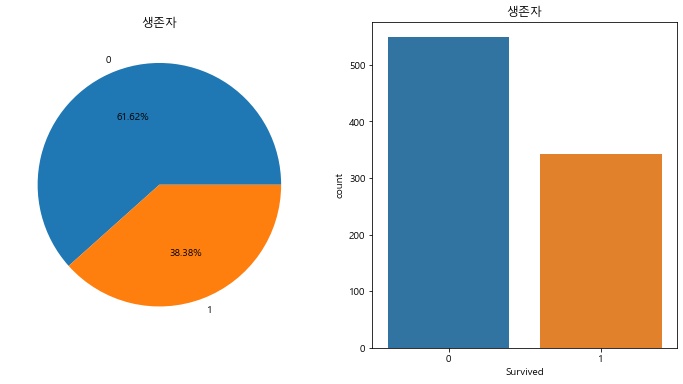

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

#한글처리
font_name = font_manager.FontProperties(
    fname='c:/Windows/Fonts/malgun.ttf'
).get_name()
rc('font', family=font_name)

f, ax = plt.subplots(1, 2, figsize=(12,6))
df['Survived'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('생존자')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df, ax=ax[1])
ax[1].set_title('생존자')
plt.show()

<AxesSubplot:>

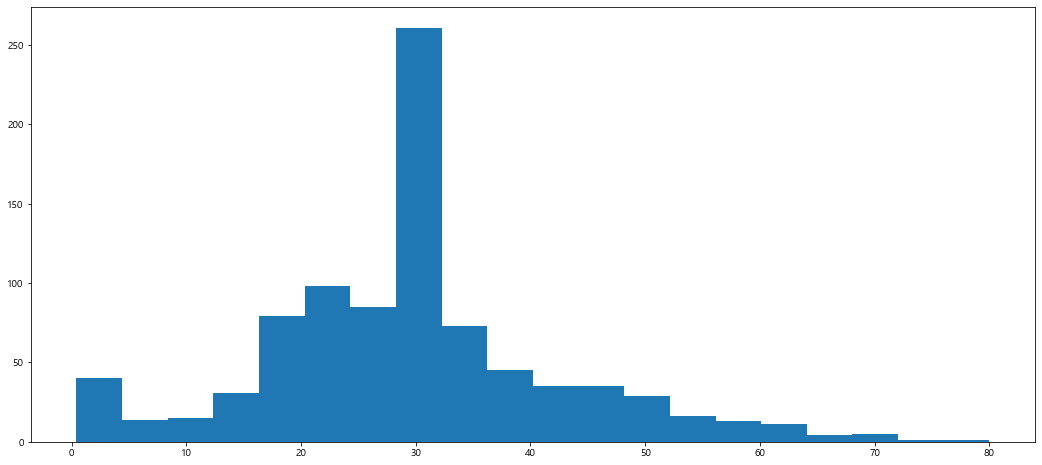

In [4]:
#승객들의 연령 분포
df['Age'].hist(bins=20, figsize=(18,8), grid=False)

In [5]:
#객실 등급통계
df.groupby('Pclass1').mean() #Pclass2, Pclass3

,Survived,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass1,,,,,,,,,
0,0.305185,0.272593,0.727407,0.674074,0.325926,27.412963,0.557037,0.389630,15.580055
1,0.629630,0.000000,0.000000,0.564815,0.435185,37.089907,0.416667,0.356481,84.154687


C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


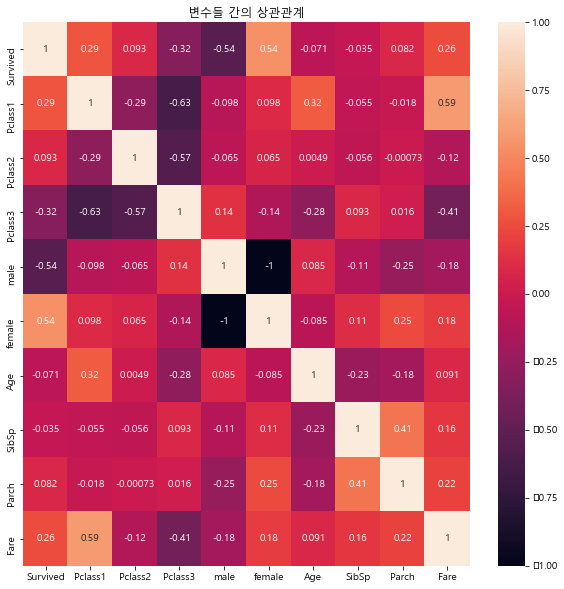

In [6]:
#상관관계 분석
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linecolor='white')
plt.title('변수들 간의 상관관계')
plt.show()

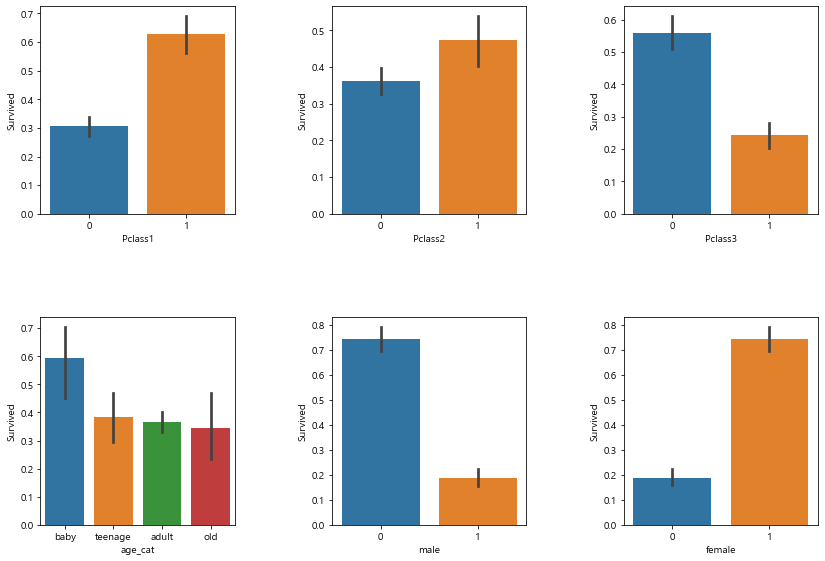

In [7]:
#연령대를 나눠서 분석
df['age_cat'] = pd.cut(df['Age'], bins=[0,10,20,50,100], include_lowest=True,
labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,8])
plt.subplot(231)

#막대 위의 세로선은 오차범위를 의미함(default: ci=95)
sns.barplot(x='Pclass1', y='Survived', data=df)
plt.subplot(232)
sns.barplot(x='Pclass2', y='Survived', data=df)
plt.subplot(233)
sns.barplot(x='Pclass3', y='Survived', data=df)
plt.subplot(234)
sns.barplot(x='age_cat', y='Survived', data=df)
plt.subplot(235)
sns.barplot(x='male', y='Survived', data=df)
plt.subplot(236)
sns.barplot(x='female', y='Survived', data=df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

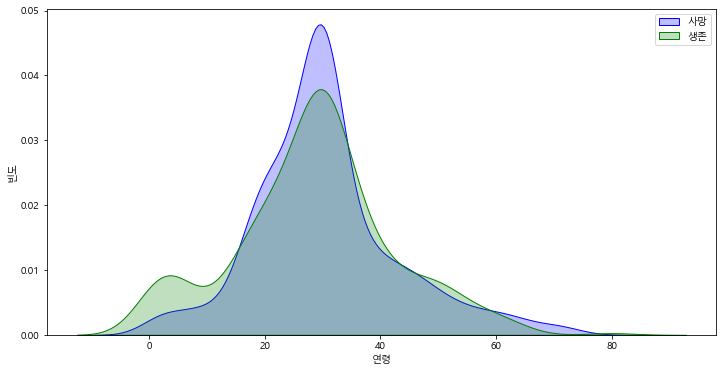

In [8]:
#나이 분포 곡선(아이들의 생존률이 상대적으로 높음)
f, ax = plt.subplots(figsize=(12,6))
#커널 밀도(kernel density) 그래프 : 히스토그램보다 부드러운 형태의 분포 곡선
g = sns.kdeplot(df['Age'][(df['Survived']==0)],
ax =ax, color='blue', shade=True)
g = sns.kdeplot(df['Age'][(df['Survived']==1)],
ax =g, color='green', shade=True)

g.set_xlabel('연령')
g.set_ylabel('빈도')
g = g.legend(['사망', '생존'])

In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
train_cols = df.columns[1:-1]
X = df[train_cols]
y = df['Survived']

In [11]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Survived'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [12]:
#오버샘플링
from imblearn.over_sampling import SMOTE

X_sample, y_sample = SMOTE(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Survived'])
df_smap = pd.concat([X_samp, y_samp], axis=1)

In [13]:
X = X_samp[train_cols]
y = y_samp['Survived']

In [14]:
from sklearn.model_selection import train_test_split
#데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=7)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #layers.core

#모델 구성
model = Sequential()
#노드개수, 독립변수 개수, 활성화함수 relu
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

#sigmoid : 0.0 ~ 1.0
model.add(Dense(1, activation='sigmoid'))

#모델 학습과정 설정
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

['c:/data/Data/titanic/scaler.model']

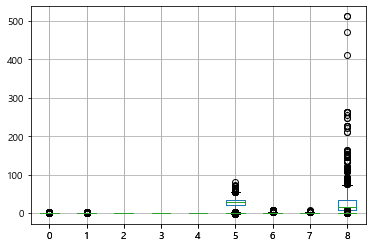

In [16]:
X_train.boxplot()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #평균0, 표준편차 1
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#넘파이 배열로 바뀜
#넘파이 배열 => 데이터프레임
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

X_train_scaled.boxplot()

from joblib import dump
dump(scaler, 'c:/data/Data/titanic/scaler.model', compress=True)

In [17]:
#모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
28/28 [==============================] - 1s 3ms/step - loss: 0.1810 - accuracy: 0.7574
Epoch 2/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1282 - accuracy: 0.8269
Epoch 3/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.8383
Epoch 4/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1185 - accuracy: 0.8405
Epoch 5/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1184 - accuracy: 0.8417
Epoch 6/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1177 - accuracy: 0.8428
Epoch 7/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1148 - accuracy: 0.8474
Epoch 8/500
28/28 [==============================] - 0s 4ms/step - loss: 0.1139 - accuracy: 0.8451
Epoch 9/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.8428
Epoch 10/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1119 - accuracy: 0.8474
Epoch 11/

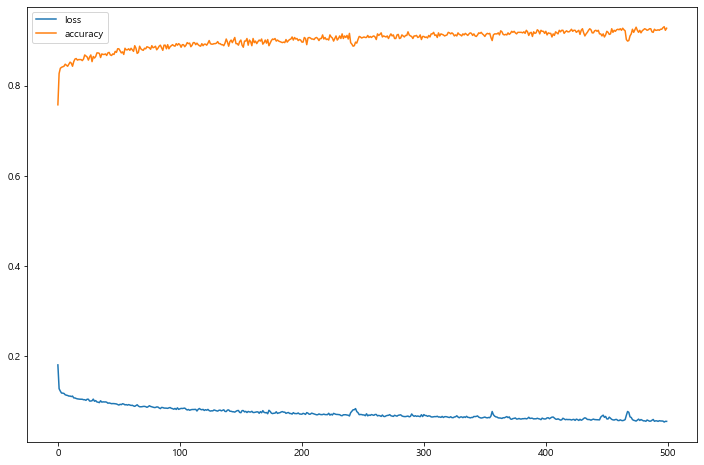

In [18]:
#loss는 손실, 학습할수록 생기는 오차는 점점 줄어듦
#accuracy는 정확도, 학습할수록 정확도는 점점 증가함

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.show()

In [19]:
#모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print('%s: %.2f%%' %(model.metrics_names[1],
scores[1]*100)) #학습용

scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print('%s: %.2f%%' %(model.metrics_names[1], scores[1]*100)) #검증용

28/28 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9328
[0.051344528794288635, 0.9328018426895142]
accuracy: 93.28%
7/7 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 0.8318
[0.1356600970029831, 0.831818163394928]
accuracy: 83.18%


In [20]:
y_test

331     0
798     0
319     1
1094    1
168     0
       ..
822     0
451     0
804     1
674     0
724     1
Name: Survived, Length: 220, dtype: int64

In [21]:
X_test

,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
331,1,0,0,1,0,45.5,0,0,28.500000
798,0,0,1,1,0,30.0,0,0,7.229200
319,1,0,0,0,1,40.0,1,1,134.500000
1094,0,0,1,1,0,9.0,0,1,18.326241
168,1,0,0,1,0,30.0,0,0,25.925000
...,...,...,...,...,...,...,...,...,...
822,1,0,0,1,0,38.0,0,0,0.000000
451,0,0,1,1,0,30.0,1,0,19.966700
804,0,0,1,1,0,27.0,0,0,6.975000
674,0,1,0,1,0,30.0,0,0,0.000000


In [22]:

#새로운 값 예측 [좌석등급(1~3), 성별(남성, 여성여부), 나이, 형제자매, 부모자녀, 요금]
person1 = [[1,0,0,0,1,15,0,0,80]]
person2 = [[1,0,0,0,1,17,0,2,30]]
person3 = [[0,1,0,0,1,40,1,1,70]]

person4 = [[0,0,1,1,0,9,0,1,18]]

#t스케일링을 해야 할 경우
person1 = scaler.transform(person1)
person2 = scaler.transform(person2)
person3 = scaler.transform(person3)

person4 = scaler.transform(person4)

print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))

print(model.predict(person4))

[[0.9999167]]
[[1.]]
[[0.9998369]]
[[0.9980952]]


In [25]:
#모형을 지정 디렉토리에 저장
model.save('c:/data/Data/titanic/titanic_keras.model')

INFO:tensorflow:Assets written to: c:/data/Data/titanic/titanic_keras.model\assets


In [26]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
ex1 = 4.4802639e-01
print(ex1)
model.predict(X_test_scaled)

0.44802639


array([[6.31352365e-01],
       [1.84313327e-01],
       [1.00000000e+00],
       [9.98035610e-01],
       [4.01238948e-01],
       [2.62290589e-04],
       [9.99940753e-01],
       [2.74214625e-01],
       [1.02888681e-01],
       [1.03141762e-01],
       [1.24387331e-01],
       [4.75544125e-01],
       [1.00000000e+00],
       [9.99998689e-01],
       [9.12099540e-01],
       [1.83875993e-01],
       [4.11884457e-01],
       [3.43560368e-01],
       [6.94316719e-03],
       [1.00000000e+00],
       [1.00000000e+00],
       [4.75504667e-01],
       [5.28614640e-01],
       [1.61660120e-01],
       [4.14050817e-01],
       [5.20269314e-05],
       [1.13713704e-01],
       [1.00000000e+00],
       [4.44831163e-01],
       [1.35656008e-02],
       [1.23736877e-02],
       [1.24287486e-01],
       [1.41658634e-01],
       [1.00000000e+00],
       [8.19428623e-01],
       [1.00000000e+00],
       [1.21379027e-03],
       [1.06595807e-01],
       [3.71267161e-05],
       [1.81040719e-01],
